# Classifying pictures of cats and dogs with Keras

Dalam notebook kali ini, akan dilakukan tutorial melakukan klasifikasi untuk kucing dan anjing.

Setelah melakukan beberapa kali epoch pada citra 2048 citra training, didapatkan akurasi sekitar ~80% pada citra berukuran 832 citra validasi.

#### Overview :
- Data loading
- Model definition, training and evaluation
- Data augmentation
- Using a pre-trained network with bottleneck


## Data

Data dapat di download di:
https://www.kaggle.com/c/dogs-vs-cats/data  

### Folder structure

```python
data/
    train/
        dogs/ ### 1024 pictures
            dog001.jpg
            dog002.jpg
            ...
        cats/ ### 1024 pictures
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/ ### 416 pictures
            dog001.jpg
            dog002.jpg
            ...
        cats/ ### 416 pictures
            cat001.jpg
            cat002.jpg
            ...
```Note : for this example we only consider 2x1000 training images and 2x400 testing images among the 2x12500 available.


Note 2 : this notebook require the Pillow framework to process images. You can install it using `pip3 install Pillow`

#### Data loading

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# dimensions citra yang akan digunakan.
img_width, img_height = 128, 128

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

### Loading data Menggunakan ImageDataGenerator

#### Image Data Generator
ImageDataGenerator merupakan *helper class* untuk memudahkan *loading* serta penyiapan data sebelum masuk ke CNN. Data hanya perlu disimpan berdasarkan *class*-nya, dan ImageDataGenerator akan langsung memuat data ke dalam suatu variabel yang siap diproses menggunakan CNN.

    Rescale : Mengubah nilai instensitas RGB dalam piksel dari [0,255] ke [0.1]. *Range* [0,255] terlalu besar untuk suatu model CNN (karena penggunaan nilai learning rate yang sangat kecil)

    train_data_dir/validation_data_dir : direktori tempat disimpannya data yang akan dimuat. Hiarki penyimpanan data harus seperti yang ditunjukkan pada Folder Structure sebelumnya.

    batch_size : Banyaknya data untuk diproses satu keli pada saat pelatihan. 

    class_mode : Jenis label yang akan di-*return* oleh ImageDataGenerator

In [3]:

datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


## Model

### Imports

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

### Model architecture definition

In [5]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height, 3))) #--> kalau pakai backend Tensorflow
#model.add(Convolution2D(32, 3, 3, input_shape=(3, img_width, img_height))) #--> kalau pakai backend Theano
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [7]:
nb_epoch = 100
batch_size = 64
nb_train_samples = 2048
nb_validation_samples = 832

In [8]:
model_hist = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples/batch_size,
        epochs=nb_epoch,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples/batch_size)

Epoch 1/100
32/32 [==============================] - 13s - loss: 0.7012 - acc: 0.4980 - val_loss: 0.6896 - val_acc: 0.5409
Epoch 2/100
32/32 [==============================] - 11s - loss: 0.6958 - acc: 0.5049 - val_loss: 0.7021 - val_acc: 0.4712
Epoch 3/100
32/32 [==============================] - 11s - loss: 0.6920 - acc: 0.5391 - val_loss: 0.6893 - val_acc: 0.5577
Epoch 4/100
32/32 [==============================] - 11s - loss: 0.6857 - acc: 0.5732 - val_loss: 0.6837 - val_acc: 0.5000
Epoch 5/100
32/32 [==============================] - 11s - loss: 0.6771 - acc: 0.5684 - val_loss: 0.6716 - val_acc: 0.6010
Epoch 6/100
32/32 [==============================] - 11s - loss: 0.6550 - acc: 0.6338 - val_loss: 0.6541 - val_acc: 0.5745
Epoch 7/100
32/32 [==============================] - 11s - loss: 0.6382 - acc: 0.6562 - val_loss: 0.6220 - val_acc: 0.6418
Epoch 8/100
32/32 [==============================] - 11s - loss: 0.6143 - acc: 0.6631 - val_loss: 0.6344 - val_acc: 0.6250
Epoch 9/100
32/3

Evaluasi akurasi pada training (biru) dan validasi (hijau) untuk 1 sampai 32 epoch:

In [9]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[1.8128638129967909, 0.72115384615384615]

In [10]:
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()


Evaluasi akurasi pada training (biru) dan validasi (hijau) untuk 1 sampai 100 epoch:

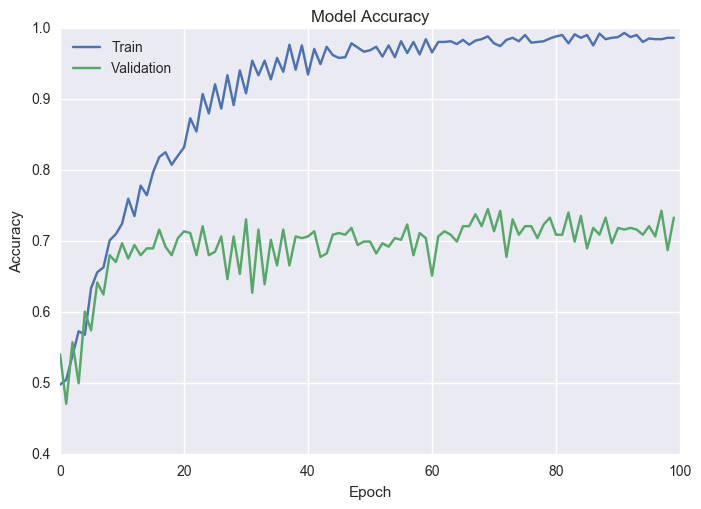

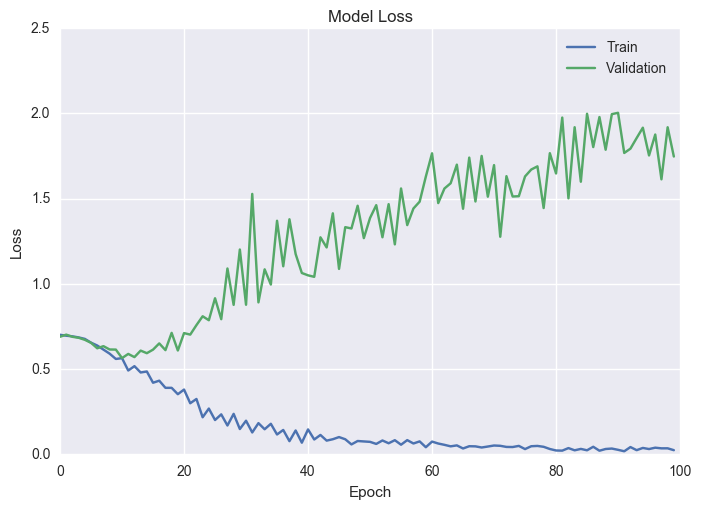

In [11]:
plot_history(model_hist)

**Setelah ~10 epoch dari model neural network yang dilakukan, akurasi mencapai ~70%. Pada epoch setelahnya, tidak ada progress akurasi yang didapatkan dari data validasi, sehingga perlu dicurigai bahwa terjadi overfitting.**


## Data augmentation

Data augmentation adalah metode untuk menghasilkan sejumlah transformasi dari satu citra asli, misal dengan melakukan rotasi, translasi, refleksi, ataupun transformasi-transformasi sehingga dihasilkan beberapa data "buatan" dari satu data asli. Dengan lebih banyak citra yang digunakan untuk pelatihan, model akan dapat melakukan generalisasi dengan lebih baik.

Contoh data augmentasi yang dilakukan pada citra yang sudah ada
![Example of data augmentation applied to a picture](pictures/cat_data_augmentation.png)

In [12]:
train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalisasi nilai piksel ke range [0,1]
        shear_range=0.2,       # miringin 
        zoom_range=0.2,        # zoom
        horizontal_flip=True)  # flip

# sama kaya kodingan train_generator sebelumnya
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 2048 images belonging to 2 classes.


In [13]:
model_augmented_hist = model.fit_generator(
        train_generator_augmented,
        steps_per_epoch=nb_train_samples/batch_size,
        epochs=nb_epoch,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples/batch_size)



Epoch 1/100
32/32 [==============================] - 12s - loss: 0.7174 - acc: 0.6953 - val_loss: 0.7251 - val_acc: 0.6611
Epoch 2/100
32/32 [==============================] - 11s - loss: 0.6017 - acc: 0.6680 - val_loss: 0.6211 - val_acc: 0.6923
Epoch 3/100
32/32 [==============================] - 11s - loss: 0.5171 - acc: 0.7529 - val_loss: 0.5729 - val_acc: 0.6899
Epoch 4/100
32/32 [==============================] - 11s - loss: 0.5331 - acc: 0.7500 - val_loss: 0.5622 - val_acc: 0.7404
Epoch 5/100
32/32 [==============================] - 12s - loss: 0.5281 - acc: 0.7520 - val_loss: 0.5613 - val_acc: 0.7115
Epoch 6/100
32/32 [==============================] - 12s - loss: 0.5355 - acc: 0.7148 - val_loss: 0.5950 - val_acc: 0.7019
Epoch 7/100
32/32 [==============================] - 12s - loss: 0.4846 - acc: 0.7598 - val_loss: 0.5749 - val_acc: 0.7212
Epoch 8/100
32/32 [==============================] - 12s - loss: 0.5226 - acc: 0.7510 - val_loss: 0.5442 - val_acc: 0.7356
Epoch 9/100
32/3

### Evaluating on validation set

Hitung loss dan akurasi setelah dikenakan data augmentation

In [14]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.64126650301309729, 0.79567307692307687]

Evaluasi akurasi pada training (biru) dan validasi (hijau) untuk 1 sampai 100 epoch:

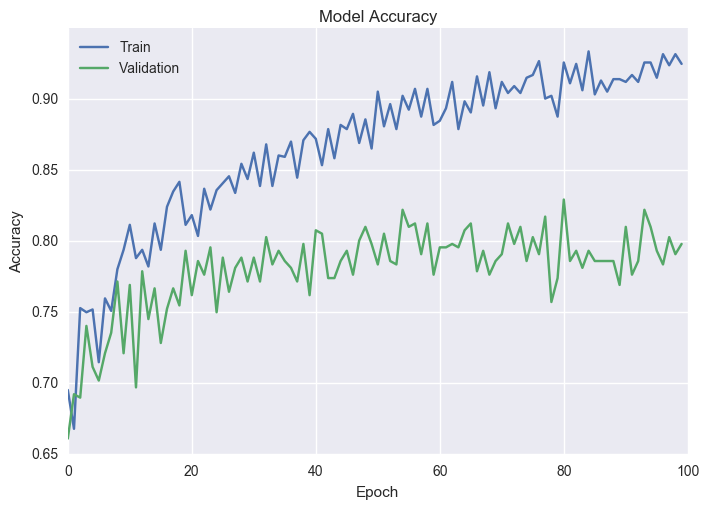

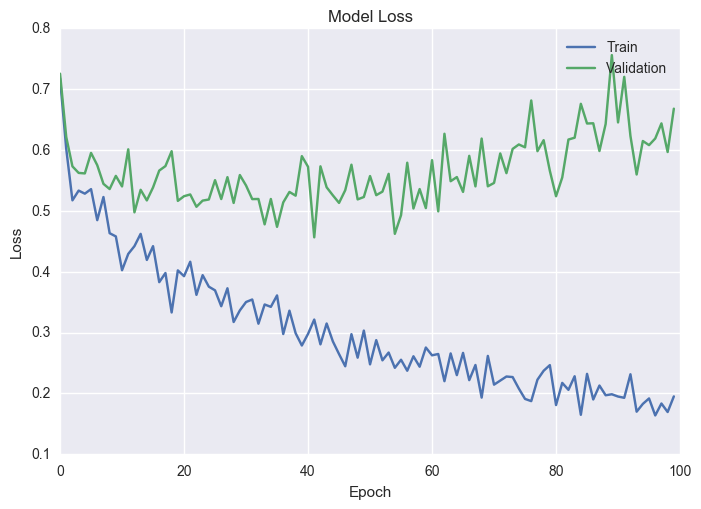

In [15]:
plot_history(model_augmented_hist)